# Universidad de Buenos Aires
# Aprendizaje Profundo - TP2
# Cohorte 18 - 1er bimestre 2025


Este segundo TP comienza desde el día después de la clase 5 (2 de abril) y la ventana de entrega estará abierta hasta las **23hs del miércoles 23 de abril (hora de Argentina)**. La resolución del TP es **individual**. Pueden utilizar los contenidos vistos en clase y otra bibliografía. Si se toman ideas de fuentes externas deben ser correctamente citadas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un link a un notebook de google colab (permitir acceso a gerardo.vilcamiza@ieee.org y gvilcamiza.ext@fi.uba.ar) y **se realizará en el siguiente link de google forms: [link](https://forms.gle/XatA691so4eVxZB68)**. Tanto los resultados, como el código y las explicaciones deben quedar guardados y visualizables en el colab.

NO ES NECESARIO QUE NOS ENVIEN COREEO AVISANDO DE LA ENTREGA.

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para este TP2.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-TP2-Co18.ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código, los gráficos y las explicaciones deben quedar guardados y visualizables en el correspondiente notebook.

# **CLASIFICADOR DE EMOCIONES**

El objetivo de este trabajo es construir una red neuronal convolucional (CNN) utilizando Pytorch, capaz de clasificar emociones humanas a partir de imágenes faciales. El clasificador deberá identificar una de las 7 emociones básicas: alegría, tristeza, enojo, miedo, sorpresa, disgusto y seriedad. El dataset se encuentra en este link: https://drive.google.com/file/d/10EWwOriegjawQ3evl1nuIldY3pUR-hQc/view?usp=sharing

## 1. Preprocesamiento de Datos (2 puntos)

Antes de entrenar el modelo, se debe analizar qué tipo de preprocesamiento se debe aplicar a las imágenes. Para esto, se puede considerar uno o más aspectos como:

- Tamaño
- Relación de aspecto
- Color o escala de grises
- Cambio de dimensionalidad
- Normalización
- Balanceo de datos
- Data augmentation
- etc.

Sean criteriosos y elijan las técnicas que consideren pertinentes.

Recomendación: usar `torchvision.transforms` para facilitar el preprocesamiento.



## 2. Construcción y entrenamiento del Modelo CNN (3.5 puntos)

- Construir una red neuronal convolucional desde cero, sin usar modelos pre-entrenados.
- Analizar correctamente qué funciones de activación se deben usar en cada etapa de la red, el learning rate a utilizar, la función de costo y el optimizador.
- Cosas como el número de capas, neuronas, tamaño de kernel, entre otros, queda a criterio de ustedes.

## 3. Evaluación del Modelo (3.5 puntos)

El modelo entrenado debe ser evaluado utilizando las siguientes métricas:

- **Accuracy**:
  - Reportar el valor final en el conjunto de test.
  - Incluir una gráfica de evolución por época para entrenamiento y validación.

- **F1 Score**:
  - Reportar el valor final en el conjunto de test.
  - Incluir una gráfica de evolución por época para entrenamiento y validación.

- **Costo (Loss)**:
  - Mostrar una gráfica de evolución del costo por época para entrenamiento y validación.

- **Classification report**
  - Mostrar la precisión, recall y F1 score por cada clase usando `classification_report`

- **Matriz de confusión**:
  - Mostrar la matriz de confusión absoluta (valores enteros).
  - Mostrar la matriz de confusión normalizada (valores entre 0 y 1 por fila).

Se recomienda utilizar `scikit-learn` para calcular métricas como accuracy, F1 score, el Classification report y las matrices de confusión. Las visualizaciones pueden realizarse con `matplotlib` o `seaborn`, separando claramente los datos de entrenamiento y validación en las gráficas.


 ## 4. Prueba con Imágenes Nuevas (1 punto)
Subir al menos 3 imágenes personales (con el rostro de ustedes o de otras personas), que no formen parte del dataset de entrenamiento ni de testeo.

- Cada imagen debe representar una emoción distinta.

- Aplicar el mismo preprocesamiento que se usó para el dataset.

- Pasar las imágenes por el modelo entrenado y mostrar:

  - La imagen original (preprocesada)

  - La clase inferida por el modelo

- Redactar conclusiones y comentarios finales

# RESOLUCIÓN

### 0. LIBRERÍAS GENERALES

In [1]:
# For data manipulation
import numpy as np

# For visualization
import matplotlib.pyplot as plt

import torch

### 1. PREPROCESAMIENTO DE DATOS

#### 1.1 PRELIMINAR

In [2]:
# import gdown
# import zipfile

# # URL del archivo de Google Drive
# url = 'https://drive.google.com/uc?id=10EWwOriegjawQ3evl1nuIldY3pUR-hQc'
# output = 'dataset.zip'

# # Descargar el archivo zip
# gdown.download(url, output, quiet=False)

# print("Dataset descargado.")

# # Descomprimir el archivo zip directamente en el directorio raíz
# with zipfile.ZipFile(output, 'r') as zip_ref:
#     zip_ref.extractall('.')  # Extraer en el directorio actual

# print("Dataset descomprimido.")

In [2]:
dataset_folderpath = './dataset_emociones/'

#### 1.1 DATA ANALYSIS

Cargamos el dataset de entrenamiento:

In [3]:
from torchvision import datasets

# Cargar el conjunto de entrenamiento
train_dataset = datasets.ImageFolder(root = dataset_folderpath + 'train')


Veamos el tamaño de las imágenes del dataset:

In [4]:
# Inicializar las alturas y anchuras
min_height = float('inf')
max_height = float('-inf')
min_width = float('inf')
max_width = float('-inf')

# Iterar sobre el conjunto de datos para obtener dimensiones
for img, label in train_dataset:
    width, height = img.size  # Obtener dimensiones de la imagen
    min_width = min(min_width, width)
    max_width = max(max_width, width)
    min_height = min(min_height, height)
    max_height = max(max_height, height)

print(f"Ancho mínimo: {min_width}, Ancho máximo: {max_width}")
print(f"Altura mínima: {min_height}, Altura máxima: {max_height}")

KeyboardInterrupt: 

**OBSERVACIONES:**

- Todas las imágenes tienen el mismo ancho y altura.

- La relación de aspecto es 1.

In [5]:
nclasses = len(train_dataset.classes)

print("La cantidad de clases es: ", nclasses)
print("Las clases son: ", train_dataset.classes)
print("Índice a Clase: ", train_dataset.class_to_idx)

La cantidad de clases es:  7
Las clases son:  ['alegria', 'disgusto', 'enojo', 'miedo', 'seriedad', 'sorpresa', 'tristeza']
Índice a Clase:  {'alegria': 0, 'disgusto': 1, 'enojo': 2, 'miedo': 3, 'seriedad': 4, 'sorpresa': 5, 'tristeza': 6}


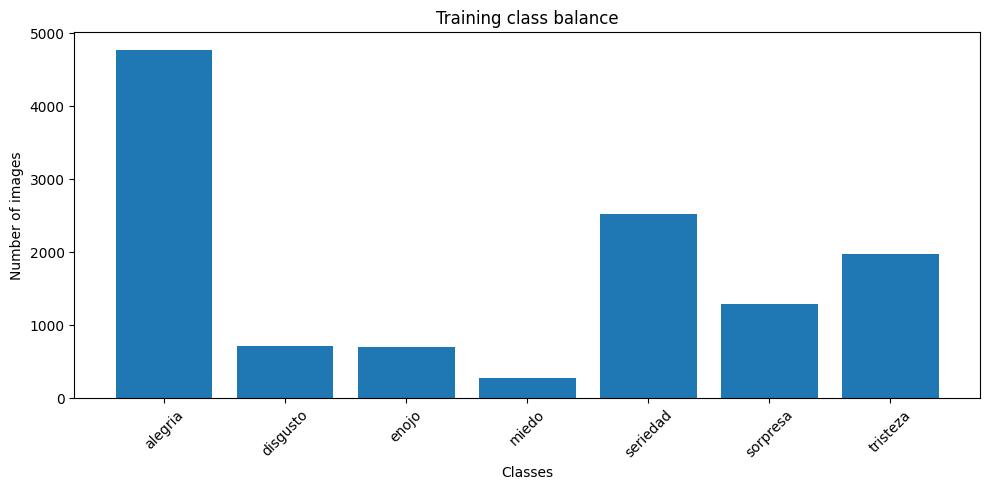

In [ ]:
from collections import Counter

# Contar las clases en el conjunto de entrenamiento
class_names = train_dataset.classes
class_counts = Counter(sample[1] for sample in train_dataset.samples)

# Obtener los nombres de las clases y sus recuentos
classes = [class_names[i] for i in range(len(class_names))]
counts = [class_counts[i] for i in range(len(class_names))]

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(classes, counts)
plt.title('Training class balance')
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**OBSERVACIONES:**

- Vemos que hay un desbalance notorio de clases.

- Dada la naturaleza de nuestro problema de clasificación, no tiene sentido que las clases esten desbalanceadas pues no se justifica que haya alguna tendencia a una emoción en particular. Se propone hacer *data augmentation* para balancear las clases para evitar que nuestro modelo sea propenso a clasificar la clases preponderante. Esto permite generalizar nuestro modelo.

Sampleamos algunas imagenes por clase

alegria


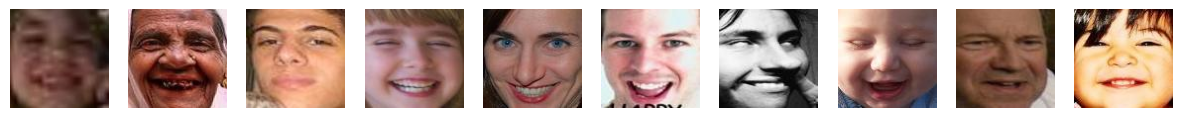

disgusto


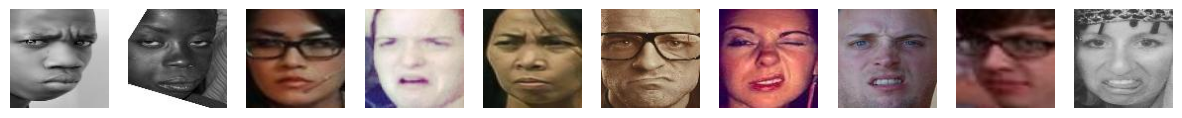

enojo


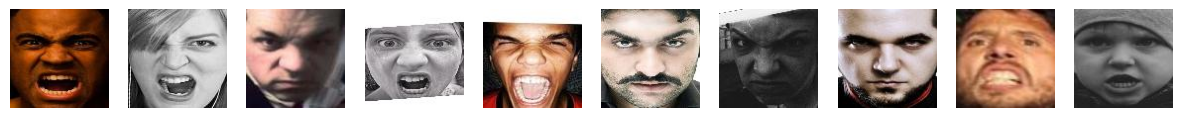

miedo


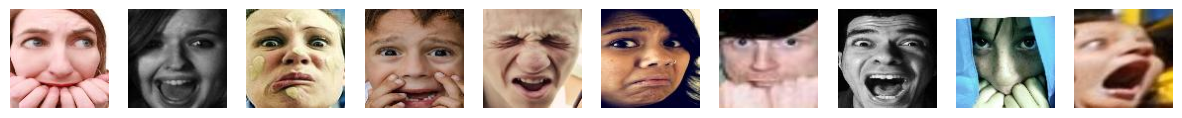

seriedad


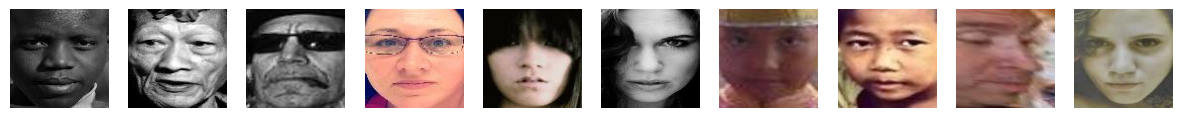

sorpresa


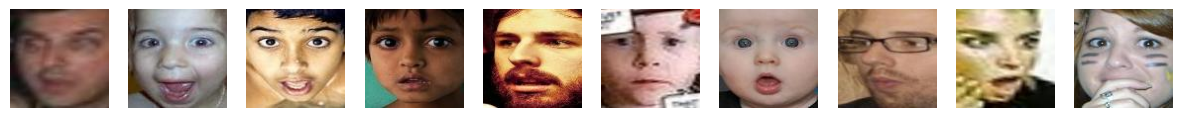

tristeza


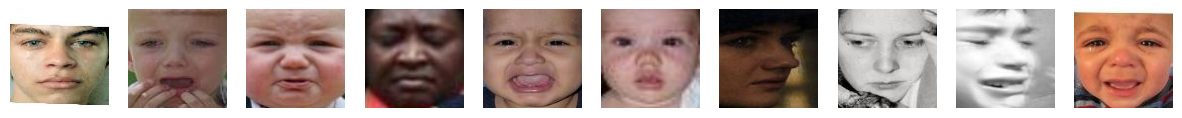

In [22]:
import random
from torchvision.transforms import v2           # usamos v2 porque es más rápido y presenta más capacidades

# Create a dictionary to store the image tensors by folder
img_data = {}
for img_path, label in train_dataset.samples:
    folder_name = train_dataset.classes[label]  # Gets the folder name from the dataset
    if folder_name not in img_data:
        img_data[folder_name] = []
    img_data[folder_name].append(img_path)

# Define the transformation
ToTensor_transform = v2.Compose([
    v2.ToImage(),                                   
    v2.ToDtype(torch.float32, scale=True),                      # Replace v1.ToTensor(): Convert images to tensor between [0,1] 
])

# Sample and display images
for i, folder in enumerate(img_data.keys()):
    print(folder)
    sample_size = 10
    # Ensure there are enough images in the folder
    if len(img_data[folder]) < sample_size:
        print(f"Not enough images in folder '{folder}' for sampling.")
        continue

    # Randomly sample image paths and apply transformations
    sampled_images = random.sample(img_data[folder], sample_size)
    
    # Note: This part still uses Image for loading but can be replaced depending on the available format
    tensors = [ToTensor_transform(datasets.folder.default_loader(path)) for path in sampled_images]

    # Create a grid of images
    plt.figure(figsize=(15, 5))
    for index, img_tensor in enumerate(tensors):
        plt.subplot(1, sample_size, index + 1)  # Create a subplot for each image
        plt.imshow(img_tensor.permute(1, 2, 0))  # Change tensor shape from (C, H, W) to (H, W, C)
        plt.axis('off')  # Hide axes

    plt.show()  # Display the images

#### 1.3 DATA AUGMENTATION

Para hacer *data augmentation* para balancear las clases, aprovechamos la funcionalidad *transforms*. En particular, aplicamos la técnica *RandAument*.

Este método necesita que se le especifiquen 2 parámetros: 

- N:    Número transformaciones a aplicar secuencialmente.
- M:    Magnitud de todas las transformaciones. Valor entre [1, 10], donde 10 indica la máxima escala para una transformación dada.

Se pueden aplicar 14 tipos de transformaciones disponibles:

- identity
- rotate 
- posterize
- sharpness
- translate-x
- autoContrast
- solarize 
- contrast 
- shear-x 
- translate-y 
- equalize 
- color 
- brightness 7
- shear-y

Más precisiones se pueden encontrar en Cubuk et. al. (2019),"RandAugment: Practical automated data augmentation with a reduced search space", 	arXiv:1909.13719, https://doi.org/10.48550/arXiv.1909.13719.

In [23]:
data_aug_transforms = v2.Compose([
                        v2.RandAugment(num_ops=5, magnitude=8),
                        ToTensor_transform
    ])

In [24]:
import os

train_data = {}

for folder in os.listdir(dataset_folderpath + 'train/'):
    img_path = dataset_folderpath + 'train/' + folder + '/'
    train_data[folder] = [img_path + img for img in os.listdir(img_path)]

max_num_img = max([len(v) for k,v in train_data.items()])
print(f"Número de imagenes en la clase preponderante: {max_num_img}")

Número de imagenes en la clase preponderante: 4772


In [25]:
aug_data = {}

for folder in os.listdir(dataset_folderpath + 'train/'):
    img_path = dataset_folderpath + 'train/' + folder + '/'
    aug_data[folder] = len(os.listdir(img_path))

In [27]:
from torchvision.utils import save_image
from PIL import Image

for folder, path_list in train_data.items():
    if len(path_list) < max_num_img:
        sets = (max_num_img-len(path_list)) // len(path_list)
        mod = (max_num_img-len(path_list)) % len(path_list)
        for i, path in enumerate(path_list):
            img = Image.open(path)
            img = img.convert('RGB')
            sets_iter = sets + 1 if i < mod else sets
            for k in range(sets_iter):
                save_image(data_aug_transforms(img), f'{dataset_folderpath}/train/{folder}/augmented_{i}_{k}.jpg')

#### 1.4 TRAIN, VALIDATION AND TEST DATASET

In [30]:
import torch
from torchvision import datasets
from torchvision.transforms import v2           # usamos v2 porque es más rápido y presenta más capacidades
from torch.utils.data import DataLoader

# Definir transformaciones
transform = v2.Compose([
    v2.Resize((100, 100)),                                      # Resize images
    ToTensor_transform,                                         # 
    v2.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),             # Normalize RGB channels
    v2.Grayscale(num_output_channels=1),                        # Convert images to grayscale
    ])

batch_size = 32

# Cargar el conjunto de entrenamiento
train_dataset = datasets.ImageFolder(root = dataset_folderpath + 'train', transform = transform)
ntrain_0 = len(train_dataset)

# Cargar el conjunto de prueba
test_dataset = datasets.ImageFolder(root = dataset_folderpath + 'test', transform = transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
ntest = len(test_dataset)

train_size_0 = ntrain_0 / (ntrain_0 + ntest)
test_size = ntest / (ntrain_0 + ntest)

# Generamos el Validation Set
val_size = 0.20 / train_size_0                    # 20% del set total                 
val_size = int(val_size * ntrain_0)
train_size = ntrain_0 - val_size
train_data, val_data = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Cargamos ambos sets
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)

ntrain = len(train_data)
nval = len(val_data)

train_size = ntrain / (ntrain + nval + ntest)
val_size = nval / (ntrain + nval + ntest)

print("Dimension del set de train:", ntrain)
print("Dimension del set de validation:", nval)
print("Dimension del set de test:", ntest)
print("")
print(f"Fracción de datos de train: {train_size:.2f}")
print(f"Fracción de datos de validation: {val_size:.2f}")
print(f"Fracción de datos de test: {test_size:.2f}")

Dimension del set de train: 26110
Dimension del set de validation: 7294
Dimension del set de test: 3068

Fracción de datos de train: 0.72
Fracción de datos de validation: 0.20
Fracción de datos de test: 0.08


**OBSERVACIONES:**

- Como consecuencia del *data agumentation* del set de train, en relación al total del set nuevo de datos, la fracción de test bajo, no obstante, la cantidad absoluta de casos de test sigue siendo la misma. 

In [31]:
for images, labels in train_loader:
    print(images.shape)  # Imprime la forma de las imágenes
    print(labels)        # Imprime las etiquetas (números enteros codificados)
    break  # Salir después del primer lote

torch.Size([32, 1, 100, 100])
tensor([2, 2, 5, 0, 5, 2, 5, 0, 2, 4, 4, 0, 0, 3, 5, 6, 1, 4, 2, 3, 0, 1, 2, 5,
        6, 1, 1, 2, 5, 1, 2, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


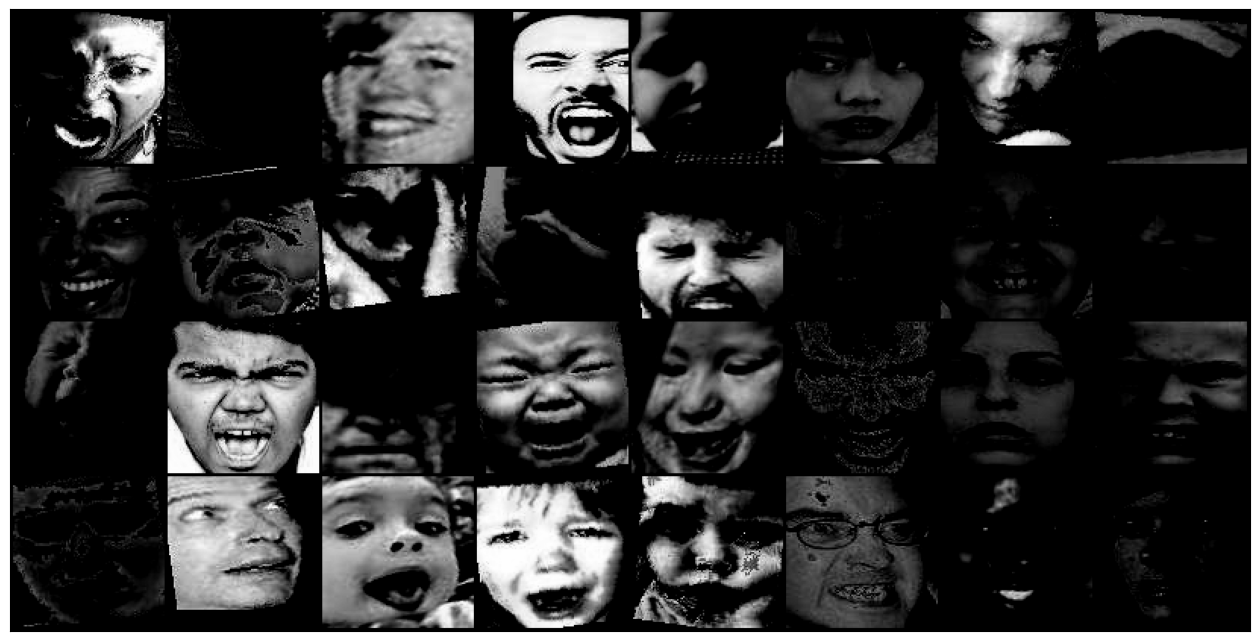

In [33]:
from torchvision.utils import make_grid

def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=8).permute(1,2,0))
        break
        
show_batch(train_loader)

### 2. CNN MODEL

#### 2.1 Model definition

Definimos una clase base con funcionalidades orientadas a entrenar el modelo, validarlo y obtener los resultados por epoch.

In [34]:
import torch.nn as nn
from torch import stack
import torch.nn.functional as F

class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                                  # Generate predictions
        loss = nn.functional.cross_entropy(out, labels)     # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]     # Recover batch losses
        epoch_loss = stack(batch_losses).mean()             # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]        # Recover batch accuracies
        epoch_acc = stack(batch_accs).mean()                # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

Defino ahora mi CNN tomando como base la clase "ImageClassificationBase" definida previamente.

In [35]:
# Bloque de convolución para emplear en mi red
def conv_block(c_in, c_out, activation = nn.ReLU(), k=3, p='same', s=1, pk=2):
    return nn.Sequential(                                   # el módulo Sequential se engarga de hacer el forward de todo lo que tiene dentro.
        nn.Conv2d(c_in, c_out, k, padding=p, stride=s),     # conv
        activation,                                         # activation
        nn.MaxPool2d(pk)                                    # pooling
    )

# Función auxiliar para calcular la dimensión de salida de la red convolucional
def calculate_output_dimensions(input_height, 
                                input_width, 
                                n_conv_layers, 
                                kernel_size, 
                                padding_type, 
                                stride, 
                                pooling_kernel_size):
    heights = []
    widths = []

    if padding_type == 'valid':
        padding = 0
    elif padding_type == 'same':
        padding = kernel_size // 2
    elif padding_type == 'full':
        padding = kernel_size - 1

    current_height = input_height
    current_width = input_width

    for _ in range(n_conv_layers):
        # Calcula la salida de la capa convolucional
        current_height = (current_height + 2 * padding - kernel_size) // stride + 1
        current_width = (current_width + 2 * padding - kernel_size) // stride + 1

        # Aplica el max pooling
        current_height = (current_height - pooling_kernel_size) // pooling_kernel_size + 1
        current_width = (current_width - pooling_kernel_size) // pooling_kernel_size + 1

        # Guarda la altura y el ancho después de cada capa
        heights.append(current_height)      # Guarda la altura
        widths.append(current_width)        # Guarda el ancho

    return heights, widths

In [36]:
class CNN_EmotionClassifier(ImageClassificationBase):
    def __init__(self, 
                 inputs_by_conv_layer = [1, 32],    # Convolutional layers
                 inputs_by_hidden_layer = [],       # Fully connected HIDDEN layers
                 n_outputs = None,
                 in_height = None,
                 in_width = None,
                 info = True):
        
        super().__init__()

        # -----------------------------------------------------
        # ACTIVATION FUNCTION
        # -----------------------------------------------------

        self.activation = nn.ReLU()

        # -----------------------------------------------------
        # CONVOLUTIONAL LAYERS
        # -----------------------------------------------------

        self.kernel = 3
        self.padding = 'same'
        self.stride = 1
        self.poolingk = 2

        self.conv = nn.ModuleList()
        self.n_conv_layers = len(inputs_by_conv_layer) - 1

        for i in range(self.n_conv_layers):
            self.conv.append(conv_block(inputs_by_conv_layer[i], 
                                        inputs_by_conv_layer[i+1], 
                                        activation = self.activation, 
                                        k=self.kernel, 
                                        p=self.padding, 
                                        s=self.stride,
                                        pk=self.poolingk))
            
        conv_heights, conv_width = calculate_output_dimensions(in_height, 
                                                                in_width,
                                                                self.n_conv_layers, 
                                                                self.kernel, 
                                                                self.padding, 
                                                                self.stride, 
                                                                self.poolingk)  

        # -----------------------------------------------------
        # FULLY CONNECTED HIDDEN LAYERS
        # -----------------------------------------------------

        self.lin = nn.ModuleList()

        conv_out_height = conv_heights[-1]  # Altura de salida de la última capa convolucional
        conv_out_width = conv_width[-1]     # Ancho de salida de la última capa convolucional
        inputs_by_lin_layer = [inputs_by_conv_layer[-1]*conv_out_height*conv_out_width]
        inputs_by_lin_layer.extend(inputs_by_hidden_layer)

        self.n_lin_layers = len(inputs_by_lin_layer) - 1
        for i in range(self.n_lin_layers):
            self.lin.append(nn.Linear(in_features=inputs_by_lin_layer[i], out_features=inputs_by_lin_layer[i + 1]))
        
        # -----------------------------------------------------
        # OUTPUT LAYERS
        # -----------------------------------------------------

        self.output = nn.Linear(in_features=inputs_by_lin_layer[-1], out_features=n_outputs)  # Output size igual a n_classes

        if info:
            print('Neural Network successfully built')
            print('Architecture:')
            print(' ')        
            print(self)
            print(' ')        
            print('Número total de capas de Convolucionales: ', self.n_conv_layers)
            print('Número total de capas de Fully Connected: ', self.n_lin_layers+1)
            print('Número total de capas : ', self.n_conv_layers + self.n_lin_layers + 1)       

        # Me fijo en el número de parámetros entrenables
        pytorch_total_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        print('Número total de parámetros a entrenar: ', pytorch_total_params)

    def forward(self, x):
        # Forward step
        # CONVOLUTIONAL LAYERS
        for i in range(self.n_conv_layers):
            x = self.conv[i](x)
        x = x.flatten(start_dim=1)
        # HIDDEN LAYERS
        for i in range(self.n_lin_layers):
            x = self.lin[i](x)
        # OUTPUT LAYER
        x = self.output(x)  # No aplicar softmax aquí, se aplica en la pérdida
        return x  # Return Logits

In [38]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    
    history = []
    optimizer = opt_func(model.parameters(),lr)
    for epoch in range(epochs):
        
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    
    return history

#### 2.1 Hyperparameter tunning

In [40]:
import optuna

def objective(trial):
       
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-2)                  # Learning rate
    n_conv_layers = trial.suggest_int('n_conv_layers', 3, 6)         # Número de capas convolucionales
    n_hidden_layers = trial.suggest_int('n_conv_layers', 3, 6)       # Número de capas fully connected
    
    last_cout = 4
    inputs_by_conv_layer = [1, last_cout]
    for i in range(n_conv_layers-1):
        inputs_by_conv_layer.append(last_cout * 2)
        last_cout *= 2
    
    # FCNN Hidden parameters
    last_hout = 64
    inputs_by_hidden_layer = [last_hout]
    for i in range(n_hidden_layers-1):
        inputs_by_hidden_layer.append(last_hout * 2)
        last_hout *= 2
        
    # Instanciamos la red
    cnn_model = CNN_EmotionClassifier(inputs_by_conv_layer,
                    inputs_by_hidden_layer,
                    n_outputs = nclasses,
                    in_height = 100,
                    in_width = 100)
    
    # Run training loop and return final loss
    num_epochs = 1
    opt_func = torch.optim.Adam
    #fitting the model on training data and record the result after each epoch
    history = fit(num_epochs, lr, cnn_model, train_loader_sample, val_loader_sample, opt_func)  

    return loss

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)
print("Best hyperparameters:", study.best_params)

[I 2025-04-26 00:19:07,665] A new study created in memory with name: no-name-29ca56c2-f9b5-4184-aaec-a437cfc4101e
C:\Users\Braian\AppData\Local\Temp\ipykernel_15108\1472125127.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-2)                  # Learning rate
[W 2025-04-26 00:19:07,685] Trial 0 failed with parameters: {'lr': 1.1714995531264845e-05, 'n_conv_layers': 5} because of the following error: NameError("name 'train_loader_sample' is not defined").
Traceback (most recent call last):
  File "c:\Python\Python311\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\Braian\AppData\Local\Temp\ipykernel_15108\1472125127.py", line 33, in objective
    history = fit(num_epochs, lr,

Neural Network successfully built
Architecture:
 
CNN_EmotionClassifier(
  (activation): ReLU()
  (conv): ModuleList(
    (0): Sequential(
      (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (3): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (4): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 

NameError: name 'train_loader_sample' is not defined

#### 2.3 Best CNN Model

In [ ]:
# CNN parameters
n_channels = 1
n_conv_layers = 3
last_cout = 4
inputs_by_conv_layer = [n_channels, last_cout]
for i in range(n_conv_layers-1):
    inputs_by_conv_layer.append(last_cout * 2)
    last_cout *= 2

# FCNN Hidden parameters
inputs_by_hidden_layer = [64, 128]

# Instanciamos la red
best_cnn_model = CNN_EmotionClassifier(**cnn_best_param)

In [ ]:
import torchinfo as torchinfo

torchinfo.summary(best_cnn_model)

#### 2.3 Training

In [ ]:
num_epochs = 30
opt_func = torch.optim.Adam
lr = 0.001
#fitting the model on training data and record the result after each epoch
history = fit(num_epochs, lr, cnn_model, train_loader, val_loader, opt_func)

Epoch [0], train_loss: 1.3883, val_loss: 1.1095, val_acc: 0.5999
Epoch [1], train_loss: 1.0056, val_loss: 0.9513, val_acc: 0.6569
Epoch [2], train_loss: 0.8498, val_loss: 0.8890, val_acc: 0.6840
Epoch [3], train_loss: 0.7598, val_loss: 0.8626, val_acc: 0.6979
Epoch [4], train_loss: 0.6874, val_loss: 0.8547, val_acc: 0.7034
Epoch [5], train_loss: 0.6223, val_loss: 0.8933, val_acc: 0.6995
Epoch [6], train_loss: 0.5673, val_loss: 0.9131, val_acc: 0.7006
Epoch [7], train_loss: 0.5151, val_loss: 0.9492, val_acc: 0.7071
Epoch [8], train_loss: 0.4803, val_loss: 1.0091, val_acc: 0.6820
Epoch [9], train_loss: 0.4330, val_loss: 1.0582, val_acc: 0.6967
Epoch [10], train_loss: 0.3890, val_loss: 1.1243, val_acc: 0.6993
Epoch [11], train_loss: 0.3601, val_loss: 1.1862, val_acc: 0.7003
Epoch [12], train_loss: 0.3293, val_loss: 1.2421, val_acc: 0.6987
Epoch [13], train_loss: 0.3158, val_loss: 1.3439, val_acc: 0.6729
Epoch [14], train_loss: 0.2870, val_loss: 1.3812, val_acc: 0.6908
Epoch [15], train_lo

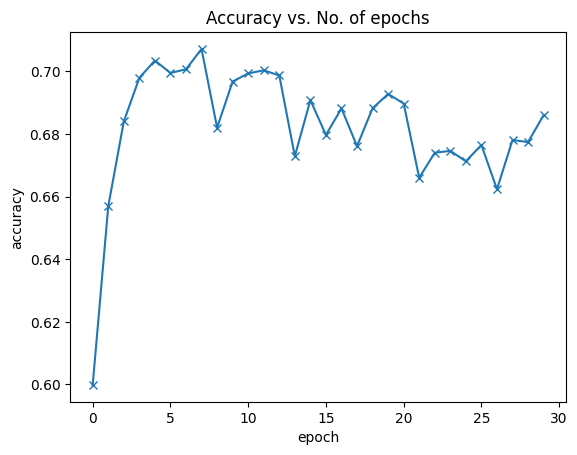

In [ ]:
def plot_accuracies(history):
    """ Plot the history of accuracies"""
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');
    

plot_accuracies(history)


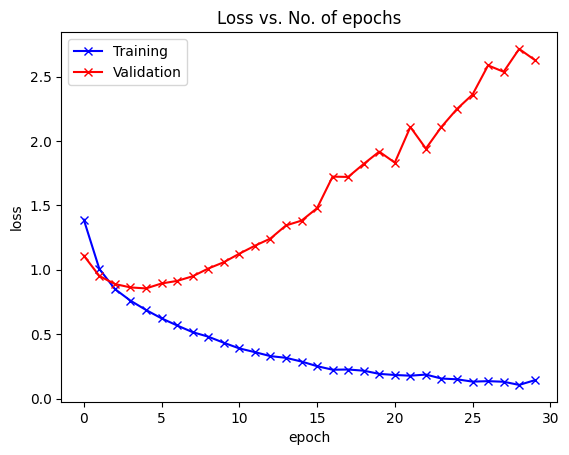

In [ ]:
def plot_losses(history):
    """ Plot the losses in each epoch"""
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)

In [ ]:
# función de entrenamiento
def fit(model, dataloader, epochs=15):
    # enviamos el modelo al device
    model.to(device)
    # definimo optimizer y la función de pérdida
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    criterion = torch.nn.CrossEntropyLoss()
    # preparamos listas para guardar las loss y la acc a lo largo de la epocas
    epoch_t_loss = []
    epoch_v_loss = []
    epoch_t_acc = []
    epoch_v_acc = []
    # iteramos en las epocas
    for epoch in range(1, epochs+1):
        # ponemos el modelo en train
        model.train()
        # listas de loss y acc de train para esta epoca
        # así despues calculamos la media
        # por que el dataset lo pasamos de a batches
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch  # sacamos X e y del batch
            X, y = X.to(device), y.to(device) # lo enviamos al device
            optimizer.zero_grad() # llevamos optimizer a zero
            y_hat = model(X)  # corremos el modelo y vemos su predicción
            loss = criterion(y_hat, y)  # calculamos la pérdida
            loss.backward() # back-propagations
            optimizer.step()  # step del optimizer
            train_loss.append(loss.item()) # vamos guardando la pérdida de este batch, en la perdida de la epoca
            # calculo de la acc
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc) # vamos guardando la acc de este batch, en la acc de la epoca
            # seteamos descriptores en la barra
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")

        # luego de pasar todo el batch, guardamos la perdida y acc media del train
        epoch_t_loss.append(np.mean(train_loss))
        epoch_t_acc.append(np.mean(train_acc))


        # ahora viene es test
        bar = tqdm(dataloader['test'])
        # listas de loss y acc de test para esta epoca
        # así despues calculamos la media
        # por que el dataset lo pasamos de a batches
        val_loss, val_acc = [], []
        # ponemos en eval el modelo
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")

        epoch_v_loss.append(np.mean(val_loss))
        epoch_v_acc.append(np.mean(val_acc))

    plt.figure()
    plt.plot(epoch_t_loss, 'r')
    plt.plot(epoch_v_loss, 'g')
    plt.title('loss')
    plt.legend(['train loss', 'val loss'])
    plt.grid()

    plt.figure()
    plt.plot(epoch_t_acc, 'r')
    plt.plot(epoch_v_acc, 'g')
    plt.title('acc')
    plt.legend(['train acc', 'val acc'])
    plt.grid()
    plt.show()